<a href="https://colab.research.google.com/github/theundertakerjr666/AWS_StudyNotes/blob/main/ML_patient_stats_devops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ingest
import NYT data

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2023.csv')
df.head()

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0


In [3]:
df.tail()

,date,county,state,fips,cases,deaths
267004,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0
267005,2023-03-23,Teton,Wyoming,56039.0,12150,16.0
267006,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0
267007,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0
267008,2023-03-23,Weston,Wyoming,56045.0,1906,23.0


In [4]:
df.columns
df.shape

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

#EDA

In [5]:
df.describe()

,fips,cases,deaths
count,264023.000000,2.670090e+05,260613.000000
mean,31487.972877,3.146473e+04,352.209924
std,16376.532871,1.193119e+05,1322.158230
min,1001.000000,0.000000e+00,0.000000
25%,19035.000000,3.147000e+03,48.000000
50%,30027.000000,7.955000e+03,111.000000
75%,46121.000000,2.071100e+04,262.000000
max,78030.000000,3.723182e+06,45155.000000


##US Cases and Deaths of Covid-19 in 2023

<Axes: xlabel='cases', ylabel='deaths'>

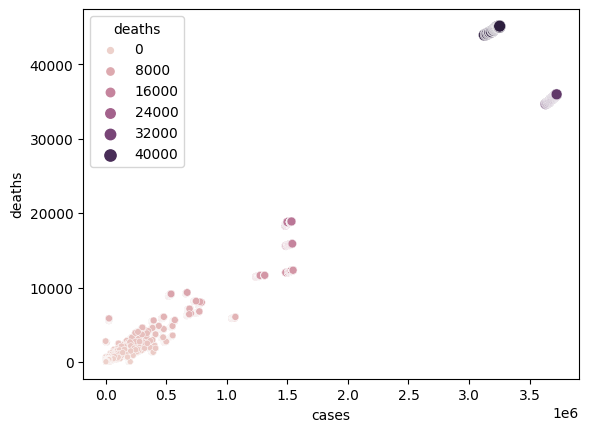

In [6]:
import seaborn as sns
sns.scatterplot(x='cases', y='deaths', hue='deaths', size='deaths', data=df)

## Date based EDA
Dealing dates by setting index

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

Filter results by date range


In [11]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days=2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2024-01-11
Two days ago 2024-01-09


In [12]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,


In [17]:
current_df = df.sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-03-23,California,6,12169158,104277
2023-03-22,California,6,12155467,104196
2023-03-21,California,6,12154941,104185
2023-03-20,California,6,12154293,104165
2023-03-19,California,6,12153083,104130
2023-03-17,California,6,12153079,104130
2023-03-18,California,6,12153079,104130
2023-03-16,California,6,12152129,104114
2023-03-15,California,6,12136243,104047


In [20]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California']

<Figure size 1500x500 with 0 Axes>

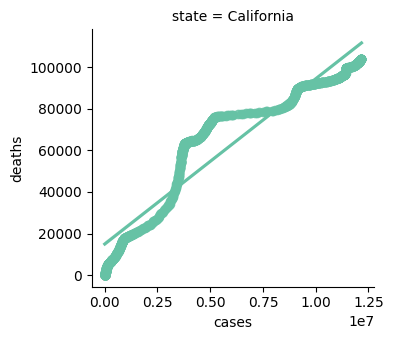

In [21]:
import matplotlib.pyplot as plt

top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")
plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths", height=3.5, col="state", col_wrap=5, hue="state", palette="Set2",data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

# Modelling

# Conclusion